# Pandas and scikit-learn

### Getting Started with pandas
* Pandas is a python version of Excel.
* panel data
* It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python
* Can be used in tandem with numerical computing tools (NumPy and SciPy), analytical libraries (statsmodels, scikit-learn) and data visualisation libraries (matplotlib).
* It adopts NumPy's idiomatic style of array-based computing, so pandas is fast. Biggest difference between the two is that Pandas is designed to work with heterogenous data, whereas NumPy is designed for homogenous numerical data.

## pandas Data Structures
* There are 2 workhorse Data Structures in pandas - Series and DataFrame.
* Not a universal solution to every problem, but provide a solid, easy-to-use basis.
* In python world, we use short name np for numpy and pd for pandas, so you always put the two lines at the top

In [1]:
import numpy as np
import pandas as pd

### Series

* 
```python
series = pd.Series(data, index)
```
* It's a 1-D array like object containing sequence of values and associated array of labels.
* The output representation for a Series shows index on the left and values on the right.
* You can access the index and values of a Series seperately through 'index' and 'values' attributes respectively.

In [2]:
countries = ['USA', 'France', 'China']
my_data = [100, 200, 300]
pd.Series(my_data, countries)

USA       100
France    200
China     300
dtype: int64

* If we do not specify an index, a default one from 0 to (n-1) is created.

In [3]:
pd.Series(my_data)

0    100
1    200
2    300
dtype: int64

In [4]:
# obj2=pd.Series(my_data, index=['d','b','a','c'])
obj2=pd.Series(my_data, index=['d','b','a'])
obj2

d    100
b    200
a    300
dtype: int64

In [9]:
x=pd.Series(my_data, index=['a', 'a', 'b']) #it doesn't check duplicates
x

a    100
a    200
b    300
dtype: int64

In [10]:
x['a']

a    100
a    200
dtype: int64

In [11]:
type(x['a'])

pandas.core.series.Series

In [12]:
type(x['b'])

numpy.int64

In [13]:
obj2.index

Index(['d', 'b', 'a'], dtype='object')

In [15]:
obj2.values #the values is a np.ndarray

array([100, 200, 300], dtype=int64)

In [16]:
np.array(my_data) 

array([100, 200, 300])

In [99]:
x=[1,2,3,'23232',True]
x.append(9)
x.insert(3, "b")
x[4]

'23232'

In [7]:
# You can also use numpy array to create Series
array = np.array(my_data) 
pd.Series(array)

0    100
1    200
2    300
dtype: int32

In [17]:
# Use dict to create Series. The keys in dict will be the index of the Series.
my_dict = {'a': 50, 'b': 60, 'c' : 70, 'd' : 80} 
pd.Series(my_dict)

a    50
b    60
c    70
d    80
dtype: int64

In [19]:
#Unlike Numpy array, Series can store different types. -- dtype will be object
my_dict = {'a': 'hello', 'b': 60, 'c' : 70, 'd' : 80} 
x=pd.Series(my_dict)
x

a    hello
b       60
c       70
d       80
dtype: object

In [20]:
x.values

array(['hello', 60, 70, 80], dtype=object)

* You can use labels in index to select single values or set of values. To select set of values you need to use list of indices.
* We can use NumPy like operations (filtering with boolean indexing, multiplication or math functions). The index-value link will not be affected by this.

In [22]:
countries = ['USA', 'France', 'China']
population = [329, 65, 1420]
worldpopulation = pd.Series(population, countries)
print(worldpopulation)
worldpopulation['USA'] #series is more like dictionary than ndarray

USA        329
France      65
China     1420
dtype: int64


329

In [23]:
print(worldpopulation)
worldpopulation['USA'] = 400 #assign value like dict
# worldpopulation[['USA', 'France', 'China', 'Canada']]
worldpopulation[['China','USA', 'France']] #change the order

USA        329
France      65
China     1420
dtype: int64


China     1420
USA        400
France      65
dtype: int64

In [24]:
worldpopulation['Canada'] = 37 #like adding new key/value pair to dictionary
print(worldpopulation)

USA        400
France      65
China     1420
Canada      37
dtype: int64


In [25]:
worldpopulation > 100 # similar to vectorization in ndarray

USA        True
France    False
China      True
Canada    False
dtype: bool

In [100]:
worldpopulation > np.array([100, 100, 100, 100])

USA        True
France    False
China      True
Canada    False
dtype: bool

In [26]:
worldpopulation[worldpopulation > 100] #boolean index, only return items with index "True"

USA       400
China    1420
dtype: int64

In [110]:
worldpopulation[pd.Series([True, False, True, False], index=['USA', 'France', 'China', 'Canada'])]
worldpopulation[[True, False, True, False]]

USA       400
China    1420
dtype: int64

In [27]:
worldpopulation * 2 # similar to vectorization in ndarray

USA        800
France     130
China     2840
Canada      74
dtype: int64

In [28]:
countries = ['USA', 'France', 'China']
genderRatio = [0.97, 0.96, 1.06]  # male/female
worldgenderRatio = pd.Series(genderRatio, countries)
worldgenderRatio

USA       0.97
France    0.96
China     1.06
dtype: float64

* in math operations, Series computes the values by index and results are in float. If there is no matched index pair, the value will be NaN (not a number)

In [29]:
worldmen=worldgenderRatio/(worldgenderRatio+1) * worldpopulation
worldmen

Canada           NaN
China     730.679612
France     31.836735
USA       196.954315
dtype: float64

In [30]:
series1 = pd.Series([1, 2, 3, 4], ['London', 'HongKong', 'Shanghai', 'Shenzhen'])
series2 = pd.Series([5, 6, 7, 8], ['London', 'Shenzhen', 'NewYork', 'Delhi'])

In [31]:
series1 - series2

Delhi       NaN
HongKong    NaN
London     -4.0
NewYork     NaN
Shanghai    NaN
Shenzhen   -2.0
dtype: float64

In [20]:
series1 + series2

Delhi        NaN
HongKong     NaN
London       6.0
NewYork      NaN
Shanghai     NaN
Shenzhen    10.0
dtype: float64

In [21]:
series1 * series2

Delhi        NaN
HongKong     NaN
London       5.0
NewYork      NaN
Shanghai     NaN
Shenzhen    24.0
dtype: float64

In [22]:
series1 / series2

Delhi            NaN
HongKong         NaN
London      0.200000
NewYork          NaN
Shanghai         NaN
Shenzhen    0.666667
dtype: float64

* Series is like a fixed-length, ordered Dictionary because mapping of index to values resembles that of a dict.
* If you have a dict, you can create a Series from it. If you are only passing the dict, then its keys become the index in order.

In [23]:
'USA' in worldpopulation #same as checking a key in dict

True

In [24]:
'Canada' in worldpopulation

True

In [25]:
'USA' in worldgenderRatio

True

In [26]:
'Canada' in worldgenderRatio

False

In [27]:
worldgenderRatio

USA       0.97
France    0.96
China     1.06
dtype: float64

* You can override this by passing dict keys in the order you want them to appear.
* In case the key list is not present in the dict, its respective value will be NaN (Python Version of missing or NA value). Missing values in Series can be found with the 'notnull' or 'isnull' operator.

In [28]:
countries = ['France', 'China','USA',  'Mexico']
newworldgenderRatio = pd.Series(worldgenderRatio, index=countries)
newworldgenderRatio

France    0.96
China     1.06
USA       0.97
Mexico     NaN
dtype: float64

In [29]:
pd.isnull(newworldgenderRatio)

France    False
China     False
USA       False
Mexico     True
dtype: bool

In [30]:
pd.notnull(newworldgenderRatio)

France     True
China      True
USA        True
Mexico    False
dtype: bool

In [31]:
newworldgenderRatio.isnull()

France    False
China     False
USA       False
Mexico     True
dtype: bool

* Series automatically aligns by the index label in arithematic operations, so the order doesn't matter.
* This alignment of indexes can be seen as similar to Joins in Databases.

In [32]:
worldpopulation

USA        400
France      65
China     1420
Canada      37
dtype: int64

In [33]:
newworldgenderRatio

France    0.96
China     1.06
USA       0.97
Mexico     NaN
dtype: float64

In [34]:
worldmen=newworldgenderRatio/(newworldgenderRatio+1) * worldpopulation #order doesn't matter. the index matches.
worldmen

Canada           NaN
China     730.679612
France     31.836735
Mexico           NaN
USA       196.954315
dtype: float64

* Both Series object and its Index have a name attribute and they integrate with other pandas functinality.

In [35]:
worldpopulation.name = 'population'
worldpopulation.index.name = 'country'

worldpopulation

country
USA        400
France      65
China     1420
Canada      37
Name: population, dtype: int64

* A Series index can be replaced in-place by assignment.

In [36]:
worldpopulation.index

Index(['USA', 'France', 'China', 'Canada'], dtype='object', name='country')

In [37]:
worldpopulation.index = ['US','FR','CN','CA']
worldpopulation.index.name = 'country'
worldpopulation

country
US     400
FR      65
CN    1420
CA      37
Name: population, dtype: int64

### DataFrame
* Represents rectangular table  of data containing ordered collection of columns, each of different value type (numeric, string, boolean, etc.).
* It has a row and column index and can be though of as a dict of Series, all sharing same index.
* Under the hood, data in DataFrame is stored as one or more 2-D blocks.
* NOTE - Even though DataFrame is 2-D, it can be used to represent higher dimensional data in tabular form using hierarchical indexing.
* It will have an index assigned automatically and columns placed in sorted order.

* Many ways to create a DataFrame, the most common is from a dict of <b> equal-length </b> lists or NumPy arrays or Series.

In [113]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
       'year' : [2000, 2001, 2002, 2001, 2002, 2003],
       'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [117]:
# The head() method will show you the first 5 rows of the DataFrame by default.
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [40]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [34]:
x=np.random.randint(low=1, high=10, size=(5, 4))
x

array([[2, 6, 4, 5],
       [5, 4, 8, 2],
       [2, 8, 8, 1],
       [3, 4, 3, 6],
       [9, 2, 1, 8]])

In [35]:
np.random.seed(100)
pd.DataFrame(data=x) #convert 2d array to dataframe
# Every column is a Series, and they share the same index, so a Dataframe is a collection of Series with same index

,0,1,2,3
0,2,6,4,5
1,5,4,8,2
2,2,8,8,1
3,3,4,3,6
4,9,2,1,8


In [42]:
# use Series to create Dataframe. The length can be different. Dataframe aligns series by index.
df = {'name': pd.Series(['Jon', 'Aaron', 'Tod'], index=['a', 'b', 'c']),
     'age': pd.Series(['39', '28', '17', '25'], index=['a', 'b', 'c', 'd']),
     'nationality': pd.Series(['US', 'China', 'US'], ['a', 'b', 'c'])}
pd.DataFrame(df)

,name,age,nationality
a,Jon,39,US
b,Aaron,28,China
c,Tod,17,US
d,NaN,25,NaN


In [124]:
data = {'name': ['Jon', 'Aaron', 'Tod'],
#      'age': ['39', '28', '17', '25'], # different length will break because there is no index to match
     'age': [39, 28, 17],
     'nationality': ['US', 'China', 'US']}
my_df = pd.DataFrame(data, index=['Lagos', 'Dubai', 'Mumbai'])
my_df

,name,age,nationality
Lagos,Jon,39,US
Dubai,Aaron,28,China
Mumbai,Tod,17,US


In [125]:
data

{'name': ['Jon', 'Aaron', 'Tod'],
 'age': [39, 28, 17],
 'nationality': ['US', 'China', 'US']}

In [224]:
pd.DataFrame(data)

,name,age,nationality
0,Jon,39,US
1,Aaron,28,China
2,Tod,17,US


In [225]:
# To arrange sequence of columns, specify the sequence.
pd.DataFrame(data, columns=['nationality', 'name','age'])

,nationality,name,age
0,US,Jon,39
1,China,Aaron,28
2,US,Tod,17


In [126]:
# If you pass a column that isn't present in the dict, it will appear with missing values (NaN).
df=pd.DataFrame(data, columns=['nationality', 'name','age', 'weight'])
df

,nationality,name,age,weight
0,US,Jon,39,NaN
1,China,Aaron,28,NaN
2,US,Tod,17,NaN


* A column can be retrieved as a Series using a dict-like notation or by attribute.
* The returned Series will have the same index as the DataFrame.

In [39]:
df.columns

Index(['nationality', 'name', 'age', 'weight'], dtype='object')

In [40]:
df['name'] #if we only retrieve one column, then it returns a Series

0      Jon
1    Aaron
2      Tod
Name: name, dtype: object

In [41]:
type(df['name'])

pandas.core.series.Series

In [42]:
df[['name', 'age']] # if we retrieve multiple columns, then it returns a DataFrame
# df['name', 'age'] # this won't work

,name,age
0,Jon,39
1,Aaron,28
2,Tod,17


In [43]:
type(df[['name', 'age']])

pandas.core.frame.DataFrame

* Attribute-like access and tab completion of column names is provided as convineance in IPython. The attribute use of column name only works if the column name is valid Python variable name (for example, if column name contains space, it won't work here).

In [121]:
d={'a':1, 'b':2}
d['a']

1

In [130]:
df['name']

0      Jon
1    Aaron
2      Tod
Name: name, dtype: object

In [129]:
getattr(df, "name") 

0      Jon
1    Aaron
2      Tod
Name: name, dtype: object

In [128]:
df.name

0      Jon
1    Aaron
2      Tod
Name: name, dtype: object

In [131]:
df.age

0    39
1    28
2    17
Name: age, dtype: int64

* Rows can be retrieved by position or name using the 'loc' method.

In [45]:
df

,nationality,name,age,weight
0,US,Jon,39,NaN
1,China,Aaron,28,NaN
2,US,Tod,17,NaN


In [46]:
df.loc[2] #now the row name is number 2, not string '2'

nationality     US
name           Tod
age             17
weight         NaN
Name: 2, dtype: object

In [47]:
df.index=['232-45-2847', '876-89-8354', '123-45-7363']
df

,nationality,name,age,weight
232-45-2847,US,Jon,39,NaN
876-89-8354,China,Aaron,28,NaN
123-45-7363,US,Tod,17,NaN


In [48]:
df.loc['876-89-8354']

nationality    China
name           Aaron
age               28
weight           NaN
Name: 876-89-8354, dtype: object

In [49]:
type(df.loc['876-89-8354'])

pandas.core.series.Series

#### Columns can be modified by assignment. We can pass a scalar values or a list of values to be assigned.
* When assigning, the length of the value list must match the length of the DataFrame.
* If we use a Series to assign to a column, its index will realign to the index of the DataFrame. Missing values will be inserted with NaNs.
* assigning a non-existant column will create a new column. New columns cannot be created with the 'attribute' method.

In [132]:
df['weight'] = 165 #broadcast to the entire column. Think about vectorization.
df

,nationality,name,age,weight
0,US,Jon,39,165
1,China,Aaron,28,165
2,US,Tod,17,165


In [133]:
df['weight'] = np.arange(3.0)
df

,nationality,name,age,weight
0,US,Jon,39,0.0
1,China,Aaron,28,1.0
2,US,Tod,17,2.0


In [134]:
df['weight'] = [1,2,3]
df

,nationality,name,age,weight
0,US,Jon,39,1
1,China,Aaron,28,2
2,US,Tod,17,3


In [55]:
# df['weight'] = np.arange(2.0) # this won't work because the lengths don't match
df

,nationality,name,age,weight
232-45-2847,US,Jon,39,0.0
876-89-8354,China,Aaron,28,1.0
123-45-7363,US,Tod,17,2.0


In [229]:
val = pd.Series([-1.2, -1.5, -1.7], index = ['876-89-8354','888-88-8888','999-99-9999'])
df['weight'] = val #it will match the index
df

,nationality,name,age,weight
232-45-2847,US,Jon,39,NaN
876-89-8354,China,Aaron,28,-1.2
123-45-7363,US,Tod,17,NaN


In [234]:
df['western'] = df.age*2 #create new column based on other columns
df

,nationality,name,age,weight,western
0,US,Jon,39,NaN,78
1,China,Aaron,28,NaN,56
2,US,Tod,17,NaN,34


* The 'del' keyword will delete columns as with a dict.
* NOTE - Any column returned from any index operation is a <b>view</b> for the DataFrame, and not a copy. <b>any change made to it will be reflected in the DataFrame</b>.

In [135]:
df['eastern'] = df.nationality != 'US'
df

,nationality,name,age,weight,eastern
0,US,Jon,39,1,False
1,China,Aaron,28,2,True
2,US,Tod,17,3,False


In [136]:
df['senior'] = df.age > 30
df

,nationality,name,age,weight,eastern,senior
0,US,Jon,39,1,False,True
1,China,Aaron,28,2,True,False
2,US,Tod,17,3,False,False


In [137]:
del df['eastern']
df

,nationality,name,age,weight,senior
0,US,Jon,39,1,True
1,China,Aaron,28,2,False
2,US,Tod,17,3,False


In [60]:
df.columns

Index(['nationality', 'name', 'age', 'weight', 'senior'], dtype='object')

#### Another method of input is nested dict of dicts.
* If it is passed as input to a DataFrame, pandas will interpret <b>outer dict keys as columns and inner keys as row indexes</b>.
* The keys of inner dict are sorted to form the index. But this can be changed if the index values are explicitly specified.

In [61]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},  # no data for 2000
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


##### wesm commented on 10 Oct 2018
##### This bug has been fixed in pandas development and will be in the next released version (either 0.23.5 or 0.24.0). Sorry about the inconvenience. You can convert the index argument to an ndarray for now index=np.array(...)
##### this is fixed in 0.24.2

In [63]:
pd.__version__

'0.25.1'

In [66]:
# pd.DataFrame(data=pop, index=[2000, 2001, 2002])  #this doesn't work in pandas 0.24.0. It is fixed in 0.24.2
pd.DataFrame(data=pop, index=pd.Series([2000, 2001, 2002]))

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [68]:
pd.DataFrame(data=pop, index=pd.Series([2001, 2002, 2003])) #match the index with the data

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


#### The same rules apply to a dict of Series.

In [149]:
print(frame3)
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

      Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5


,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [151]:
frame3['Ohio']

2001    1.7
2002    3.6
2000    1.5
Name: Ohio, dtype: float64

In [152]:
frame3['Ohio'][:-1]

2001    1.7
2002    3.6
Name: Ohio, dtype: float64

In [148]:
x=['a', 'b', 'c', 'd']
x[-2]==x[2]

True

#### Transpose a dataframe (swap rows with columns) by T.
* If index and columns in a DataFrame have their name attributes set, they will also be displayed.
* The values attribute returns the data in a DataFrame as a 2-D ndarray.
* If the dtypes of the columns are different, then the output ndarray's dtype will be chosen in such a way as to accomodate all the columns.

In [70]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [71]:
frame3.index.name = 'year'
frame3.columns.name = 'state'

frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [72]:
frame3.values #it is a 2d array, i.e., a matrix

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [73]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [74]:
frame.values # now the dtype is object

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

### Dropping Entries from an Axis
* Dropping entries from an axis is easy if you already have index array or list without those entries.
* The 'drop' method will return a new object with the indicate dvalues deleted from the axis.
* In DataFrames, index values can be deleted from either axis using the drop function.
* By default drop will delete values from row axis. To delet from columns, you need to specify 'axis=1' or "axis='columns'".

In [67]:
obj = pd.Series(np.arange(5.), index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [68]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [69]:
obj #original dataframe doesn't change

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [70]:
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [71]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [72]:
# add index and column names to matrix
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['Ohio','Colorado','Utah','New York'],
                   columns = ['one','two','three','four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [73]:
data.drop(['Colorado', 'Ohio']) #drop rows

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [74]:
data.drop('two', axis=1) #drop columns

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [75]:
data.drop(['two','four'], axis='columns') # it throws errors if drop non-exist columns

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


#### drop, like many other functions which modify size or shape of Series or DataFrame, can manipulate objects in-place without returning a new object. ``` inplace=True``` Careful with inplace, as it can destroy any data that it drops.

In [101]:
obj = pd.Series(np.arange(5.), index=['a','b','c','d','e'])
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection and Filtering
* series indexing works similarly to NumPy array indexing. <b>Difference is that for Series you can use index values insted of only integers.</b>
* <b>label-based slicing in pandas is inclusive</b>
* Using slices for modifications will modify the Series as well because slices are <b>views</b>.

In [102]:
obj = pd.Series(np.arange(4.), index = ['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [103]:
obj['b']

1.0

In [104]:
obj[1]

1.0

In [105]:
obj[2:4] # endpoint is not inclusive

c    2.0
d    3.0
dtype: float64

In [106]:
obj[2:3] # endpoint is not inclusive

c    2.0
dtype: float64

In [107]:
obj['b':'c']# label-based slicign endpoint is inclusive

b    1.0
c    2.0
dtype: float64

In [108]:
obj[['b','a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [109]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [110]:
obj[obj < 2] #boolean indexing

a    0.0
b    1.0
dtype: float64

In [111]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

#### DataFrame indexing is for retrieving 1 or more columns through single value or sequence. 

In [112]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['Ohio','Colorado','Utah','New York'],
                   columns = ['one','two','three','four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [113]:
data['two'] #because dataframe is conceptually a dict of series

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [114]:
type(data['two'])

pandas.core.series.Series

In [115]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [116]:
type(data[['three', 'one']])

pandas.core.frame.DataFrame

#### There are some special cases in this indexing - 
* 1. Selecting data with Boolean array - This <b>filters rows</b> based on the value of a column and selects all the columns.

In [117]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [118]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [119]:
data[data['three'] > 5] #filter rows

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


* 2. Indexing with a Boolean dataframe, usually by scalar comparison - This DataFrame looks more like a 2-D NumPy array.

In [120]:
data < 5 #boolean dataframe

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [121]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### DataFrame Selection Options
* Selecting data by row numbers (.iloc). The iloc indexer syntax is ```data.iloc[<row selection>, <column selection>]```, which is sure to be a source of confusion for R users. “iloc” in pandas is used to select rows and columns by number, in the order that they appear in the data frame. 
* Selecting data by label or by a conditional statment (.loc). The loc indexer is used with the same syntax as iloc: ```data.loc[<row selection>, <column selection>]``` .

In [122]:
print(data)
data.loc['Colorado']

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


one      0
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [123]:
type(data.loc['Colorado'])

pandas.core.series.Series

In [124]:
data.loc['Colorado', ['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

In [125]:
print(data)
data.iloc[2, [3,0,1]]

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


four    11
one      8
two      9
Name: Utah, dtype: int32

#### Both the operators work with slices as well as single labels and list of labels.

In [126]:
print(data)
data.loc[:'Utah', 'two']

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [127]:
print(data)
print(data.three > 5)
print(data.iloc[:, :3])
data.iloc[:, :3][data.three > 5]

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool
          one  two  three
Ohio        0    0      0
Colorado    0    5      6
Utah        8    9     10
New York   12   13     14


,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Integer Indexes
* Working with pandas objects <b>indexed with integers</b> is slightly different from in-built Python Data Structures on indexing semantics.
* <b>Negative index below will give an error because it expects -1 to be an index.</b>

In [76]:
ser = pd.Series(np.arange(3.))
print(ser)
print(ser[1]) #good
# ser[-1] #bad, ambiguity
ser.index

0    0.0
1    1.0
2    2.0
dtype: float64
1.0


RangeIndex(start=0, stop=3, step=1)

#### Hence to keep things consistent, axis with integer labels will always be label oriented.
#### Without introducing subtle bugs, we can always use loc and iloc for precise handling.

In [129]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [130]:
ser[:1]

0    0.0
dtype: float64

In [131]:
ser.loc[:1] #label indexing is inclusive

0    0.0
1    1.0
dtype: float64

In [132]:
ser.iloc[:1]

0    0.0
dtype: float64

In [133]:
ser2 = pd.Series(np.arange(3.), index=['a','b','c'])
print(ser2)
ser2[-1] #this negative index is ok because there is no ambiguity

a    0.0
b    1.0
c    2.0
dtype: float64


2.0

### Arithematic and Data Alignment

#### Series alignment
* If index pairs of the the objects you are adding are not same, the result's index will be a <b>union of both.</b> This is similar to automatic Outer Join in Databases.
* This internal data alignment introduces NaN values to labels that don't overlap. The missing values will propagate in further arithematic computations.

In [134]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a','c','d','e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a','c','e','f','g'])

s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [135]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [136]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

#### DataFrames alignment 
* So the result of adding 2 DataFrames is a DataFrame whose index and columns are unions of each of the DataFrames.
* Missing values will apear both in the row and column indices whose labels are not common to the 2 objects.
* If the row or column has no values, the result will als o contain NaNs.

In [137]:
df1 = pd.DataFrame(np.arange(9.).reshape((3,3)), columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4,3)), columns=list('bde'), 
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [138]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [139]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [140]:
df1 + df2 #trying to put everything together by matching the coordinates

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [153]:
df1 = pd.DataFrame({'A': [1,2]})
df2 = pd.DataFrame({'a': [3,4]})

In [154]:
df1

,A
0,1
1,2


In [155]:
df2

,a
0,3
1,4


In [156]:
df1 - df2

,A,a
0,NaN,NaN
1,NaN,NaN


### Arithematic Methods with Fill Values
* Give a default value to the missing value, to avoid NaN in the results.
* This involves using the 'add' method with a 'fill_value'.
* Useful in combining statistical data

In [145]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)), columns=list('abcde'))
print(df1);print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [146]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [147]:
df1.add(df2, fill_value=0) #impute the missing value by zero

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


### Operations between DataFrame and Series
* Broadcasting: In NumPy, when you run an operation between a 2-D and a 1-D array, the 1-D array is operated on all the rows of the 2-D array.
* The same broadcasting happens on DataFrame and Series.
* By default, arithematic between DataFrame and Series matches insex of the Series on the Columns, broadcasting down rows.
* If index values are not found, objects will be reindexed to form the union. 

In [152]:
# For NumPy

arr = np.arange(12.).reshape((3,4)) #become a matrix
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [153]:
arr - arr[0] #where arr[0] is operated on all rows

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [154]:
# For DataFrame and Series
# add column names and index to wrap matrix into dataframe
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
                    columns=list('bde'),
                    index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

In [155]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [156]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [157]:
frame - series #similar to numpy array, series is operated on all rows

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [158]:
series2 = pd.Series(range(3), index=['b','e','f'])
series2

b    0
e    1
f    2
dtype: int64

In [159]:
frame+series2 #both d and f become NaN

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


#### The above examples all broadcast over rows. If you want to match on rows and broadcast over Columns, use one of the arithematic methods.
#### The axis you pass is the axis to match on. To match on row index we pass axis='index' or axis=0.

In [160]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [161]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [162]:
frame.sub(series3, axis='index') #use sub here instead of -

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping
* NumPy ufuncs can also work with pandas objects.
* We can also apply user defined functions for 1-D arrays to each row or column using DataFrame's <b>'apply'</b> method.
* The function will be invoked once on each column. Result will be Series having Columns of frame as its index.
* By passing ```axis='columns'```, the function will be invoked once per row.

In [162]:
frame = pd.DataFrame(np.random.randn(4,3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.583595,0.816847,0.672721
Ohio,-0.104411,-0.531280,1.029733
Texas,-0.438136,-1.118318,1.618982
Oregon,1.541605,-0.251879,-0.842436


In [163]:
np.abs(frame)

,b,d,e
Utah,0.583595,0.816847,0.672721
Ohio,0.104411,0.531280,1.029733
Texas,0.438136,1.118318,1.618982
Oregon,1.541605,0.251879,0.842436


In [157]:
def sq(x):
    return x*x

sq(9)

81

In [159]:
sq=lambda x: x*x
sq(9)

81

In [160]:
(lambda x: x*x)(9)

81

In [164]:
f = lambda x: x.max() - x.min()
print(frame)
frame.apply(f) #applies on each column because frame is a dict of series, i.e., columns

               b         d         e
Utah   -0.583595  0.816847  0.672721
Ohio   -0.104411 -0.531280  1.029733
Texas  -0.438136 -1.118318  1.618982
Oregon  1.541605 -0.251879 -0.842436


b    2.125200
d    1.935165
e    2.461417
dtype: float64

In [80]:
frame.apply(f, axis='columns') #applies on each row

Utah      2.902801
Ohio      1.233757
Texas     1.291223
Oregon    0.893190
dtype: float64

* Most of the common array statistics are DataFrame methods, so using apply is not necessary.
* The functions may not return a scalar value, but may also return a Series.
* Element-wise Python functions can be applied to pandas objects using <b>'applymap'</b>.
* The name is because series has a method 'map' for applying functions for each element.

In [167]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min','max']) #for each column, return a series

frame.apply(f)

,b,d,e
min,-1.266911,-1.440771,-1.084174
max,1.376996,0.271005,2.140763


In [168]:
shortformat = lambda x: '%.2f' % x
frame.applymap(shortformat) #Element-wise Python functions 

,b,d,e
Utah,1.01,-1.44,0.98
Ohio,1.38,-0.23,0.48
Texas,-1.27,0.27,2.14
Oregon,0.48,0.25,-1.08


In [169]:
print(type(frame['e']))
print(frame['e'])
frame['e'].map(shortformat)

<class 'pandas.core.series.Series'>
Utah      0.980569
Ohio      0.480924
Texas     2.140763
Oregon   -1.084174
Name: e, dtype: float64


Utah       0.98
Ohio       0.48
Texas      2.14
Oregon    -1.08
Name: e, dtype: object

## Summarizing and Computing Descriptive Statistics
* pandas has a set of common mathematical and statistical methods library.
* These methods can be classified into 'reductions' or 'summary statistics', i.e. extract single value from a Series or a Series of values from rows or columns of DataFrame.
* Like NumPy, these methods have built-in handling for missing data.

* sum method returns a Series containing column sums.
* Passing axis='columns' or axis=1 sums across columns instead.
* NA values are excluded unless entire entire slice in NA. It can be disabled with skipna option.

In [190]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                  [np.nan, np.nan], [0.75,-1.3]],
                 index=['a','b','c','d'],
                 columns=['one','two'])

df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [191]:
df.sum() #keep in mind, dataframe is dict of series, so the sum() applies on each column

one    9.25
two   -5.80
dtype: float64

In [192]:
df.sum(axis='columns') #on rows

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [193]:
df.mean(axis='columns') #NA values are excluded unless entire entire slice in NA. It can be disabled with skipna option.

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [194]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

* Some methods (eg - idxmin, idxmax) return indirect statistic like index value where the min or max values were attained. 

In [195]:
print(df)
df.idxmax()

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


one    b
two    d
dtype: object

### Correlation and Covariance
* Some summary statistics (correlation, covariance) are computed from pairs of arguments.
* We will be using pandas-datareader package with Quandl information for this example

In [82]:
#in anaconda prompt, run "pip install pandas_datareader"
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG', 'FB']}

In [83]:
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2015-09-11   28.552500   27.940001   27.947500   28.552500  199662000.0   
 2015-09-14   29.222500   28.715000   29.145000   28.827499  233453600.0   
 2015-09-15   29.132500   28.605000   28.982500   29.070000  173364800.0   
 2015-09-16   29.135000   28.860001   29.062500   29.102501  148694000.0   
 2015-09-17   29.122499   28.430000   28.915001   28.480000  256450400.0   
 ...                ...         ...         ...         ...          ...   
 2020-09-01  134.800003  130.529999  132.759995  134.179993  152470100.0   
 2020-09-02  137.979996  127.000000  137.589996  131.399994  200119000.0   
 2020-09-03  128.839996  120.500000  126.910004  120.879997  257599600.0   
 2020-09-04  123.699997  110.889999  120.070000  120.959999  332607200.0   
 2020-09-08  118.989998  112.680000  113.949997  112.820000  230220200.0   
 
  

In [203]:
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

In [204]:
price.head()

,AAPL,IBM,MSFT,GOOG,FB
Date,,,,,
2014-09-29,91.860641,153.569412,41.571568,574.781921,79.000000
2014-09-30,92.447876,153.723282,41.499958,575.779175,79.040001
2014-10-01,91.007271,151.569229,41.088188,566.714111,76.550003
2014-10-02,91.667946,151.358704,40.962856,568.519104,77.080002
2014-10-03,91.411026,152.783905,41.258266,573.704895,77.440002


* We can get percent changes as a time-series operation using pct_change.
* The 'corr' method computes correlation of overlapping, non-NA, aligned-by-index values of 2 series.
* Similarly, 'cov' computes covariance between 2 Series.
* Using Column name as an attribute allows corr and cov between 2 Series without index labels. corr and cov on a DataFrame returns a full matrix.
* Using 'corrwith' we can compute pairwise correlations between DataFrame's columns or rows with another Series or DataFrame. 
* Passing a Series in 'corrwith' will return a Series with correlation value for each column. Passing a DataFrame gets correlations of matching column names.
* Passing axis='columns' does things row-by-row instead.

In [205]:
returns = price.pct_change()
print(price.head())
returns.head()

                 AAPL         IBM       MSFT        GOOG         FB
Date                                                               
2014-09-29  91.860641  153.569412  41.571568  574.781921  79.000000
2014-09-30  92.447876  153.723282  41.499958  575.779175  79.040001
2014-10-01  91.007271  151.569229  41.088188  566.714111  76.550003
2014-10-02  91.667946  151.358704  40.962856  568.519104  77.080002
2014-10-03  91.411026  152.783905  41.258266  573.704895  77.440002


,AAPL,IBM,MSFT,GOOG,FB
Date,,,,,
2014-09-29,NaN,NaN,NaN,NaN,NaN
2014-09-30,0.006393,0.001002,-0.001723,0.001735,0.000506
2014-10-01,-0.015583,-0.014013,-0.009922,-0.015744,-0.031503
2014-10-02,0.007260,-0.001389,-0.003050,0.003185,0.006924
2014-10-03,-0.002803,0.009416,0.007212,0.009122,0.004670


In [206]:
returns['FB'].corr(returns['AAPL'])

0.46136684376385184

In [207]:
returns.FB.corr(returns.AAPL)

0.46136684376385184

In [208]:
returns.corr()

,AAPL,IBM,MSFT,GOOG,FB
AAPL,1.000000,0.393446,0.573123,0.520007,0.461367
IBM,0.393446,1.000000,0.477561,0.404453,0.285436
MSFT,0.573123,0.477561,1.000000,0.652889,0.516776
GOOG,0.520007,0.404453,0.652889,1.000000,0.595653
FB,0.461367,0.285436,0.516776,0.595653,1.000000


In [209]:
returns.cov()

,AAPL,IBM,MSFT,GOOG,FB
AAPL,0.000246,0.000081,0.000134,0.000124,0.000130
IBM,0.000081,0.000172,0.000093,0.000081,0.000067
MSFT,0.000134,0.000093,0.000221,0.000148,0.000138
GOOG,0.000124,0.000081,0.000148,0.000233,0.000163
FB,0.000130,0.000067,0.000138,0.000163,0.000323


In [210]:
returns.corrwith(returns.AAPL)

AAPL    1.000000
IBM     0.393446
MSFT    0.573123
GOOG    0.520007
FB      0.461367
dtype: float64

In [211]:
returns.corrwith(volume)

AAPL   -0.108697
IBM    -0.156933
MSFT   -0.085673
GOOG   -0.018069
FB     -0.102226
dtype: float64

# Introduction to Scikit-learn

### Data Loading

Get some data to play with

In [168]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [169]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [170]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [173]:
digits.data.shape

(1797, 64)

In [174]:
digits.target.shape

(1797,)

In [175]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [176]:
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

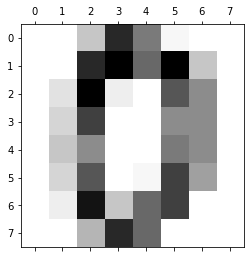

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook <- interactive interface

plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)

In [178]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [179]:
digits.target[0]

0

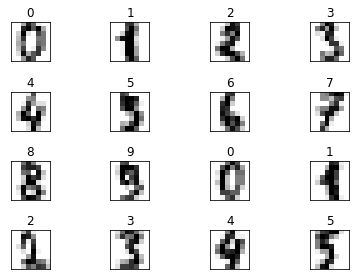

In [180]:
fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.25, random_state=1)

In [182]:
digits.data.shape

(1797, 64)

In [183]:
X_train.shape

(1347, 64)

In [184]:
X_test.shape

(450, 64)

## scikit-learn

In [185]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [186]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)

In [187]:
X_train.shape

(1347, 64)

In [188]:
np.bincount(y_train)

array([141, 139, 133, 138, 143, 134, 129, 131, 126, 133], dtype=int64)

In [166]:
np.bincount([1,1,1,1,1,1,3,3,3,3,3,3,3])

array([0, 6, 0, 7], dtype=int64)

In [189]:
y_train

array([2, 8, 9, ..., 7, 7, 8])

Simple steps to use scikit-learn
-------------------
0) Import your model class

In [32]:
from sklearn.svm import LinearSVC

1) Instantiate an object and set the parameters

In [33]:
svm = LinearSVC()

2) Fit the model

In [34]:
svm.fit(X_train, y_train)

C:\Users\David Li\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

3) Apply / evaluate

In [35]:
print(svm.predict(X_train))
print(y_train)

[2 8 9 ... 7 7 8]
[2 8 9 ... 7 7 8]


In [36]:
svm.score(X_train, y_train)

0.9970304380103935

In [37]:
svm.score(X_test, y_test)

0.9377777777777778

One more
---------

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=50)

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rf.score(X_test, y_test)

0.9822222222222222

## Lab exercise of today: ETF intraday volatility vs volume


### What Is an ETF?

* An exchange traded fund (ETF) is a type of security that involves a collection of securities—such as stocks—that often tracks an underlying index, although they can invest in any number of industry sectors or use various strategies. ETFs are in many ways similar to mutual funds; however, they are listed on exchanges and ETF shares trade throughout the day just like ordinary stock.


* Some well-known example is the SPDR S&P 500 ETF (SPY), which tracks the S&P 500 Index. ETFs can contain many types of investments, including stocks, commodities, bonds, or a mixture of investment types. An exchange traded fund is a marketable security, meaning it has an associated price that allows it to be easily bought and sold.

### We will use SPY in this lab exercise

* import the useful packages

```python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
```


* You can download the csv file from the page, or use the pandas_datareader in the sample code, to load the daily data of 2019 into dataframe

    https://finance.yahoo.com/quote/SPY/history?period1=1546300800&period2=1577750400&interval=1d&filter=history&frequency=1d
    
    
* We compute the intraday volatility as Volatility = (High-Low)/Close


* We then compute the volume change as Volume_delta = Volume_today - Volume_prevday


* We then compute the volatility change as Volatility_delta = Volatility_today - Volatility_prevday


* Plot Volume_delta and Volatility_delta. What do you find?

    Use the sample code to generate graph
    
```python
your_data_frame.plot(x='Volume_delta', y='Volatility_delta', style='.')
```

## Homework 1: Continue your research on other ETFs and stocks. (two weeks from today)

* You pick other ETFs and check the intraday volatility vs volume as the lab exercise. You can pick from the list 

    https://etfdb.com/compare/volume/


* Conduct the same research on the most active stocks

    https://www.barchart.com/stocks/most-active/daily-volume-leaders


* Write a summary about what you find. Anything interesing and/or worth to mention will be good enough.